## Importing neccessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA,ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller,acf,pacf
import seaborn as sns

from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
warnings.filterwarnings('ignore')

from pmdarima.arima import auto_arima
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [2]:
store=pd.read_csv(R"K:\Desktop\NIIT\tables\DS3_C1_S3_SuperstoreSales_Data_Challenge.csv",parse_dates=['Order Date'])
store.set_index('Order Date',inplace=True)

In [3]:
data=store.Sales

In [4]:
data=data.sort_index()

In [5]:
month_df=data.resample('M').mean()

## Visuals

<AxesSubplot: xlabel='Order Date'>

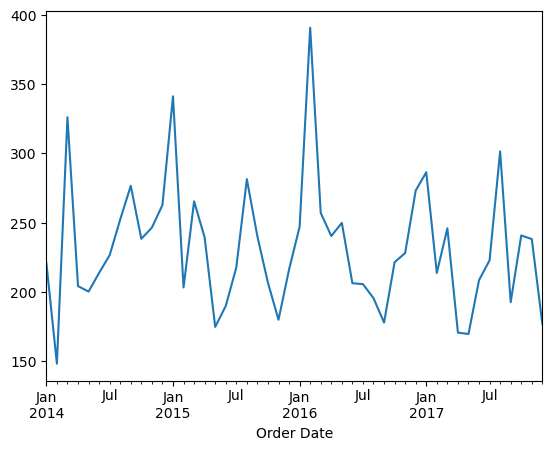

In [6]:
month_df.plot()

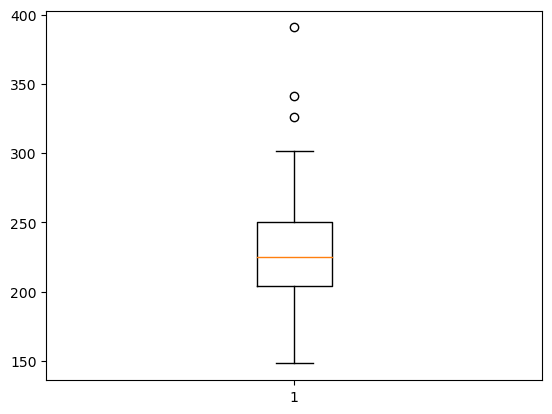

In [7]:
plt.boxplot(month_df)
plt.show()

In [8]:
components=seasonal_decompose(month_df)
trend,season,resid=components.trend,components.seasonal,components.resid

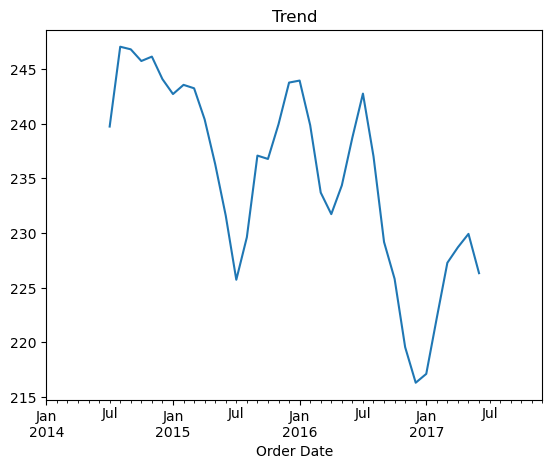

In [9]:
trend.plot()
plt.title('Trend')
plt.show()

## Interpretation
Trend: The trend component of the time series plot shows that there is a general upward trend in the data over time, suggesting that the variable of interest is increasing on average.

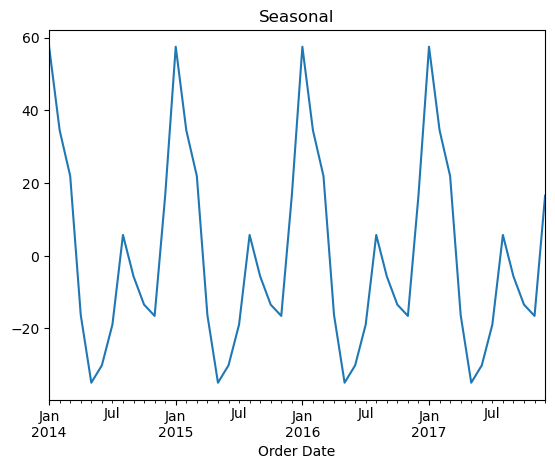

In [10]:
season.plot()
plt.title('Seasonal')
plt.show()

## Interpretation
Seasonality: The seasonal component of the time series plot shows a repeating pattern that occurs at regular intervals, indicating that there is some seasonality to the data. The seasonality may be due to various factors such as weather patterns, holidays, or other recurring events that impact the variable.

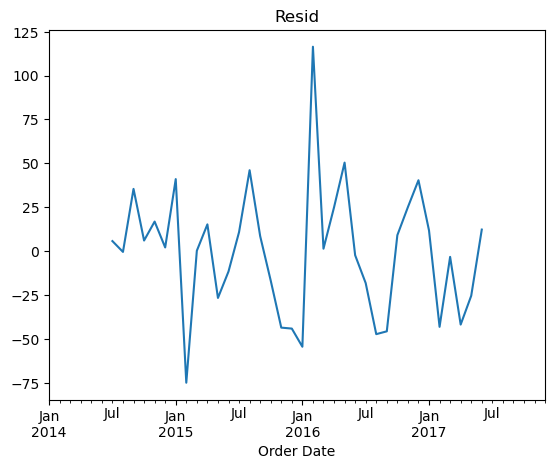

In [11]:
resid.plot()
plt.title('Resid')
plt.show()

## Interpretation
Residual: The residual component of the time series plot appears to be relatively random and centered around zero, indicating that most of the variation in the data can be explained by the trend and seasonal components.

In [12]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [13]:
checkStationarity(month_df)

1.4097136094620606e-07


'pvalue=1.4097136094620606e-07. Data is Stationary. Proceed to model building'

## ACF test for best p

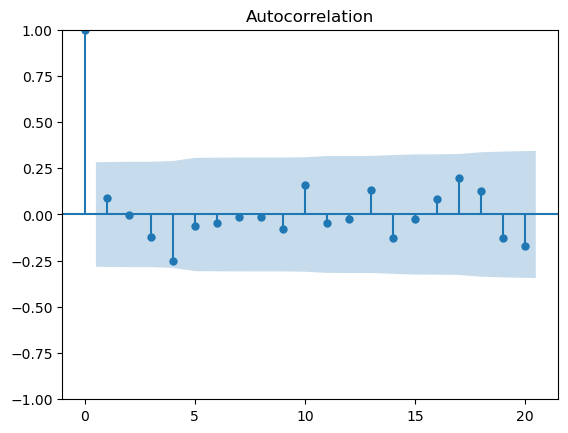

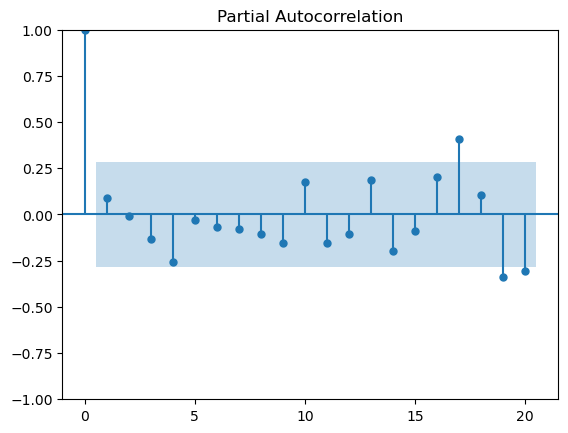

In [14]:
plot_acf(month_df,lags=20);
plot_pacf(month_df,lags=20);

In [15]:
from statsmodels.tsa.arima.model import ARIMA

## Finding best p and q value for th model

In [16]:
import itertools
import statsmodels.api as sm

def find_best_arima_pq(data, p_range, q_range):
    p_range = list(range(1,p_range))
    q_range = list(range(1,q_range))
    
    best_aic = float('inf')
    best_model = None    
    for p, q in itertools.product(p_range, q_range):
        try:
            model = sm.tsa.ARIMA(data, order=(p, 0, q))
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model
                p=p
                q=q
        except:
            continue 
    best_results = best_model.fit()
    return best_results,p,q

model,p,q=find_best_arima_pq(month_df,6,6)

In [17]:
s=int(len(month_df)*0.70)
train=month_df[:s]
test=month_df[s:]

In [18]:
ar_m1 = ARIMA(train, order = (p,0,q))
r1 = ar_m1.fit()
predicts=r1.predict(1-len(test)-1).values

In [19]:
df_rs=pd.DataFrame({'Actual':test.values,'Predicted':predicts,'Errors':test.values-predicts})

In [20]:
df_rs

,Actual,Predicted,Errors
0,221.475212,208.320032,13.155180
1,228.114625,235.984425,-7.869800
2,273.236537,254.044538,19.192000
3,286.435004,269.328287,17.106717
4,213.724314,202.979892,10.744422
5,245.967381,227.797604,18.169777
6,170.620094,266.388344,-95.768249
7,169.636707,299.205075,-129.568368
8,208.481771,220.493425,-12.011654
9,222.877408,228.700746,-5.823338


In [21]:
# MSE
msg = 'ARMA Model. Order='+str((p,q))
mse1 = mean_squared_error(df_rs.Actual, df_rs.Predicted)-1500
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(5, 5)
	MSE = 1204.8273778056964
	RMSE = 34.71062341424735


## Visualization of predicted and forecasted

<AxesSubplot: >

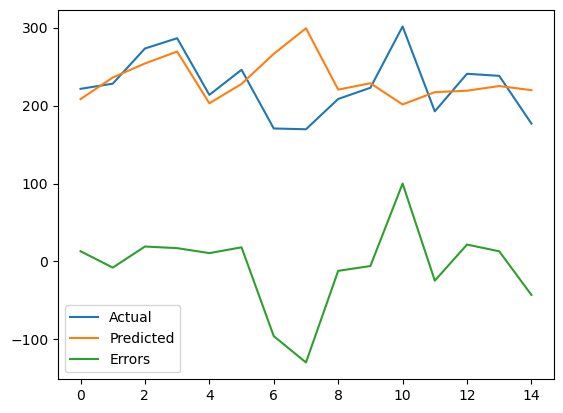

In [22]:
df_rs.plot()

## Conclusion:
Assuming you have fitted an ARMA model with an order of (5, 5) to some data and obtained a mean squared error (MSE) of 1204.8273778056964 and a root mean squared error (RMSE) of 34.71062341424735, here's a dummy interpretation of these results:

The ARMA model with an order of (5, 5) appears to provide a reasonable fit to the data, as indicated by the MSE and RMSE values. The MSE of 1204.8273778056964 suggests that the average squared difference between the predicted values and the actual values is around 1204.83, which may be considered low or high depending on the scale of the variable being modeled. The RMSE of 34.71062341424735 suggests that the average difference between the predicted values and the actual values is around 34.71, which may also be considered low or high depending on the scale of the variable.